# 主题：多元统计分析
#### 参考教材：
* 应用多元统计分析。Wolfgang Hardle; Leopold Simar
* 实用多元统计分析。Richard A.Johnson; Dean W.Wichern

In [1]:
#如果使用python，则需要先使用下面的命令
#%load_ext rpy2.ipython
# 而且，调用R时，前面都要加上“%%R”

## 第一章：批量数据比较
### 1.1 几种常见的图形

In [44]:
# 导入数据
library(gdata)
data= read.xls("F:/python/R-project/mvstats.xls",sheet='d3.1',perl="C:\\Strawberry\\perl\\bin\\perl.exe",fileEncoding='utf-8',header=TRUE,stringsAsFactors=FALSE)
# 另一种形式：data<- read.xls("F:/python/R-project/mvcase.xls",sheet=3,perl="C:\\Strawberry\\perl\\bin\\perl.exe",fileEncoding='utf-8')
#data[is.infinite(data)] = NA
tail(data)
summary(data)

,X,食品,衣着,设备,医疗,交通,教育,居住,杂项
26,西藏,3836.51,880.10,271.29,272.81,866.33,441.02,628.35,335.66
27,陕西,3063.69,910.29,513.08,678.38,866.76,1230.74,831.27,332.84
28,甘肃,2824.42,939.89,505.16,564.25,861.47,1058.66,768.28,353.65
29,青海,2803.45,898.54,484.71,613.24,785.27,953.87,641.93,331.38
30,宁夏,2760.74,994.47,480.84,645.98,859.04,863.36,910.68,302.17
31,新疆,2760.69,1183.69,475.23,598.78,890.30,896.79,736.99,331.80


      X                  食品           衣着             设备      
 Length:31          Min.   :2600   Min.   : 452.9   Min.   :271.3  
 Class :character   1st Qu.:2825   1st Qu.: 910.3   1st Qu.:476.5  
 Mode  :character   Median :3384   Median : 994.5   Median :546.8  
                    Mean   :3511   Mean   :1019.6   Mean   :565.6  
                    3rd Qu.:3755   3rd Qu.:1095.8   3rd Qu.:653.2  
                    Max.   :6125   Max.   :1512.9   Max.   :981.1  
      医疗             交通             教育           居住       
 Min.   : 272.8   Min.   : 733.0   Min.   : 441   Min.   : 628.4  
 1st Qu.: 548.3   1st Qu.: 870.3   1st Qu.: 946   1st Qu.: 776.4  
 Median : 646.0   Median :1010.5   Median :1054   Median : 869.6  
 Mean   : 674.5   Mean   :1233.9   Mean   :1231   Mean   : 936.6  
 3rd Qu.: 751.0   3rd Qu.:1306.5   3rd Qu.:1265   3rd Qu.:1037.3  
 Max.   :1294.1   Max.   :3153.7   Max.   :2654   Max.   :1444.9  
      杂项      
 Min.   :174.2  
 1st Qu.:284.4  
 Median :325.6  
 Me

Warning message in data(is.numeric(data)):
"data set 'is.numeric(data)' not found"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in min(x):
"min里所有的参数都不存在; 回覆Inf"Warning message in max(x):
"max里所有的参数都不存在；回覆-Inf"

ERROR: Error in plot.window(xlim, ylim, log = log, ...): 'ylim'值不能是无限的


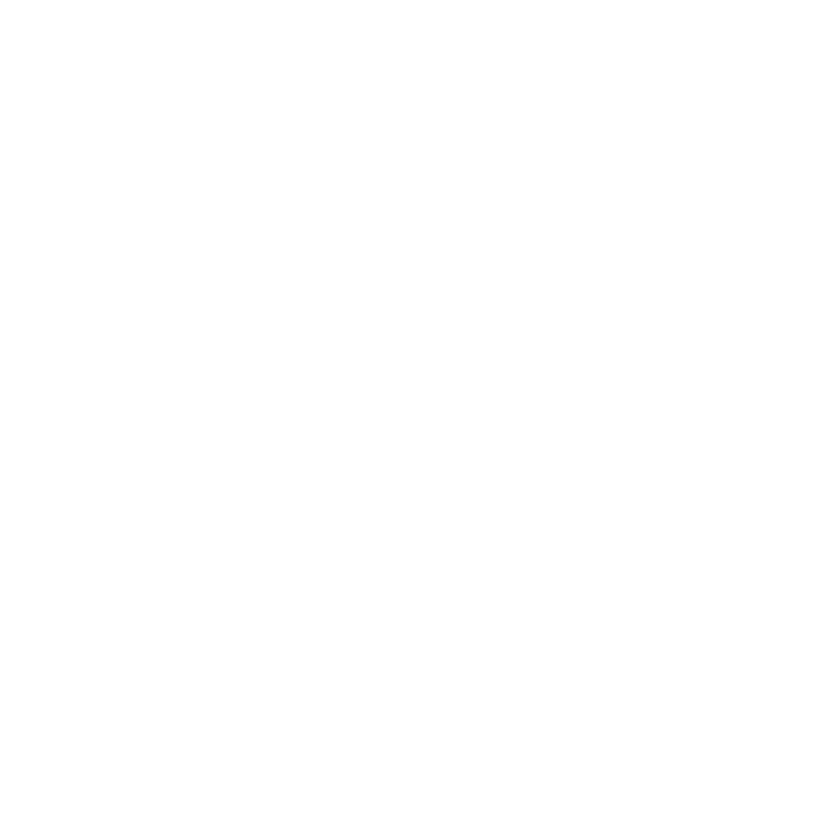

In [59]:
barplot(sapply(data,mean))

ERROR: Error in match.fun(FUN): 缺少参数"FUN",也没有缺省值


In [23]:
data=read.table('clipboard',header=T)
summary(data)

 地区    性别     教育程度      年龄           月收入         月支出    
 A:204   男:603   低:319   Min.   : 6.00   Min.   : 637   Min.   : 797  
 B:401   女:597   高:303   1st Qu.:34.00   1st Qu.:2388   1st Qu.:1722  
 C:384            中:578   Median :40.00   Median :2978   Median :1993  
 D:211                     Mean   :40.15   Mean   :3006   Mean   :1997  
                           3rd Qu.:47.00   3rd Qu.:3624   3rd Qu.:2262  
                           Max.   :72.00   Max.   :6239   Max.   :3385  

In [21]:
table(data(地区))

地区,性别,教育程度,年龄,月收入,月支出
A,女,中,55,2299,1423
A,女,低,39,3378,2022
A,女,中,33,3460,1868
B,男,高,41,4564,1918
B,女,高,55,3206,1906
A,女,中,48,4043,2233
D,女,高,36,3395,1428
C,男,中,50,5363,1931
B,男,中,49,6227,2608
D,女,中,21,2836,1164
